In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
df=pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
## with the help of describe we get to know the mean median and mode also the int values of the columns 
df.describe()
## it seems some of the data is having 0 val. as min which is not possible for a data , cleaning is req

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.shape
## data seems to be having ok values for tree regressor 

(768, 9)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [16]:
df.describe()
## it seems data is cleaned for futher processing 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df['Outcome'].unique()

array([1, 0])

In [23]:
df.info()
df.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot: >

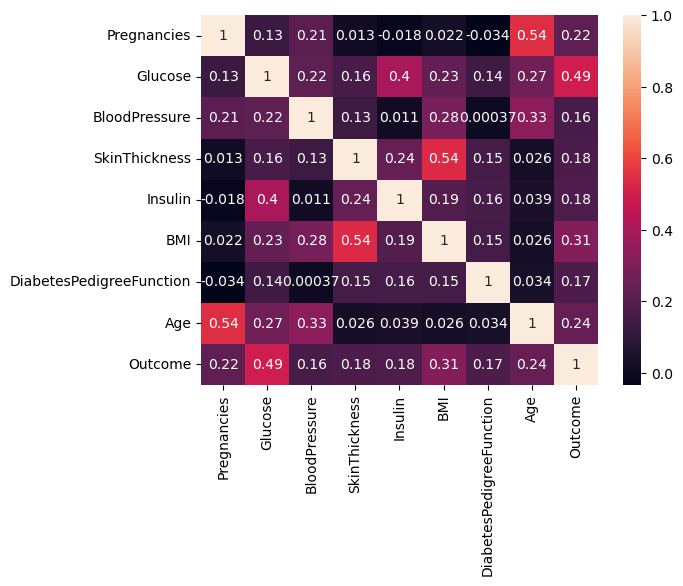

In [25]:
sns.heatmap(df.corr(),annot=True)
## we can see the data which are highly correlated 

In [32]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [37]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115.0,98.000000,20.536458,79.799479,24.0,1.022,34
223,7,142.0,60.000000,33.000000,190.000000,28.8,0.687,61
393,4,116.0,72.000000,12.000000,87.000000,22.1,0.463,37
766,1,126.0,60.000000,20.536458,79.799479,30.1,0.349,47
570,3,78.0,70.000000,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,20.536458,79.799479,22.4,0.207,27
270,10,101.0,86.000000,37.000000,79.799479,45.6,1.136,38
435,0,141.0,69.105469,20.536458,79.799479,42.4,0.205,29


<AxesSubplot: >

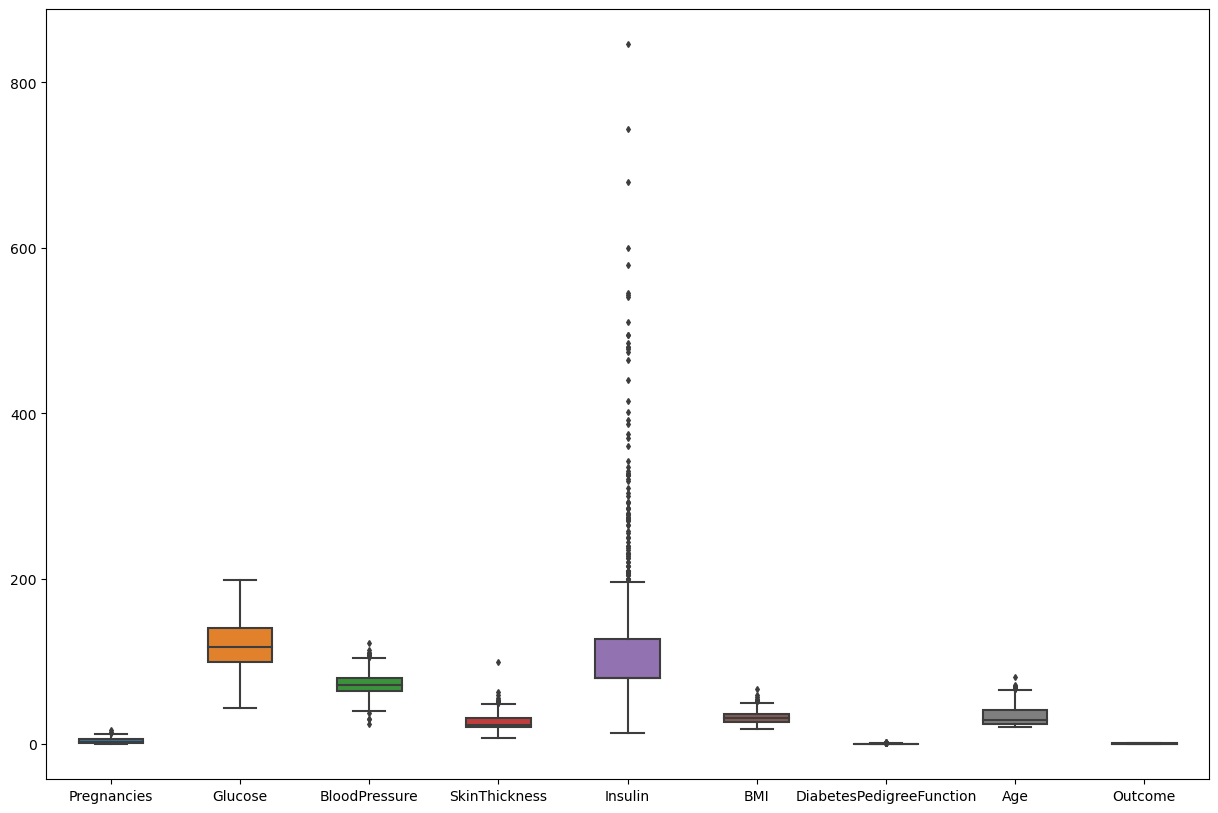

In [39]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)
## it seems insulin have many outliers data needs to be scaled 

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
regression=LogisticRegression(max_iter=200)

In [45]:
regression.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [46]:
y_pred=regression.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

## Confusion Matrices ,Accuracy,Classification Report 

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [51]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
## these are the values of the prediction made with repect to all 3 type with accuracy below 

[[140  28]
 [ 36  50]]
0.7480314960629921
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.64      0.58      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254



In [59]:
## now we will check for the cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [60]:
cv=KFold(n_splits=5)
scores=cross_val_score(regression,X_train,y_train,scoring='accuracy',cv=5)


In [61]:
scores

array([0.83495146, 0.7184466 , 0.80582524, 0.7184466 , 0.76470588])

In [63]:
np.mean(scores)
#this is the mean accuracy of the cross validation of the dataset 

0.7684751570531125

# Logistic Regression Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter={
    'penalty':['l1','l2','elasticnet'],
    'C':[10,20,30]
}

In [66]:
regression=LogisticRegression()

In [69]:
clf=GridSearchCV(regression,param_grid=parameter,scoring='accuracy',cv=5)

In [70]:
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 20, 30],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [71]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 20, 30],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [72]:
y_pred=clf.predict(X_test)

In [73]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [74]:
clf.best_params_

{'C': 30, 'penalty': 'l2'}

In [75]:
clf.best_score_

0.7645916619074814

In [76]:
regression=LogisticRegression(C=30,penalty='l2')

In [77]:
regression

LogisticRegression(C=30)

In [78]:
regression.fit(X_train,y_train)

LogisticRegression(C=30)

In [79]:
y_pred=regression.predict(X_test)

In [80]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [84]:
regression.predict_proba(X_test)

array([[0.75094773, 0.24905227],
       [0.8373418 , 0.1626582 ],
       [0.89580705, 0.10419295],
       [0.85438606, 0.14561394],
       [0.54645953, 0.45354047],
       [0.59036266, 0.40963734],
       [0.98854139, 0.01145861],
       [0.57147877, 0.42852123],
       [0.41311656, 0.58688344],
       [0.22827238, 0.77172762],
       [0.80414314, 0.19585686],
       [0.09890778, 0.90109222],
       [0.59447764, 0.40552236],
       [0.70788599, 0.29211401],
       [0.92973616, 0.07026384],
       [0.58977525, 0.41022475],
       [0.8979203 , 0.1020797 ],
       [0.9388809 , 0.0611191 ],
       [0.23560061, 0.76439939],
       [0.3669192 , 0.6330808 ],
       [0.83272872, 0.16727128],
       [0.9349112 , 0.0650888 ],
       [0.58531396, 0.41468604],
       [0.9130877 , 0.0869123 ],
       [0.45407642, 0.54592358],
       [0.09821975, 0.90178025],
       [0.90448859, 0.09551141],
       [0.97413693, 0.02586307],
       [0.75199607, 0.24800393],
       [0.89666726, 0.10333274],
       [0.

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
rndm_clf=RandomizedSearchCV(LogisticRegression(),param_distributions=parameter,cv=5,n_iter=20)

In [87]:
rndm_clf

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [10, 20, 30],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [88]:
rndm_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [10, 20, 30],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [89]:
y_pred=rndm_clf.predict(X_test)

In [90]:
rndm_clf.best_params_

{'penalty': 'l2', 'C': 30}

# NOW For Decision Tree Regressor 

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
regressor=DecisionTreeRegressor()

In [95]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [96]:
y_pred=regressor.predict(X_test)

In [102]:
y_pred

array([1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [100]:
## for calculation r2 score 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [101]:
score

-0.3361018826135109

In [103]:
## Hyperparameter tuning of data
parameter={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto', 'sqrt', 'log2']
}

In [104]:
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

In [105]:
regressorcv

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [106]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [107]:
regressorcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [109]:
regression=DecisionTreeRegressor(criterion='absolute_error',max_depth=8,max_features='log2',splitter='best')

In [110]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

[Text(0.6387924382716049, 0.9705882352941176, 'x[1] <= 154.5\nsquared_error = 0.229\nsamples = 514\nvalue = 0.354'),
 Text(0.37017746913580246, 0.9117647058823529, 'x[7] <= 30.5\nsquared_error = 0.191\nsamples = 432\nvalue = 0.257'),
 Text(0.22762345679012347, 0.8529411764705882, 'x[1] <= 127.5\nsquared_error = 0.12\nsamples = 251\nvalue = 0.139'),
 Text(0.12808641975308643, 0.7941176470588235, 'x[5] <= 45.45\nsquared_error = 0.077\nsamples = 203\nvalue = 0.084'),
 Text(0.11574074074074074, 0.7352941176470589, 'x[0] <= 6.5\nsquared_error = 0.065\nsamples = 200\nvalue = 0.07'),
 Text(0.10339506172839506, 0.6764705882352942, 'x[1] <= 104.5\nsquared_error = 0.061\nsamples = 199\nvalue = 0.065'),
 Text(0.04938271604938271, 0.6176470588235294, 'x[4] <= 156.0\nsquared_error = 0.019\nsamples = 105\nvalue = 0.019'),
 Text(0.024691358024691357, 0.5588235294117647, 'x[3] <= 41.0\nsquared_error = 0.01\nsamples = 102\nvalue = 0.01'),
 Text(0.012345679012345678, 0.5, 'squared_error = 0.0\nsamples =

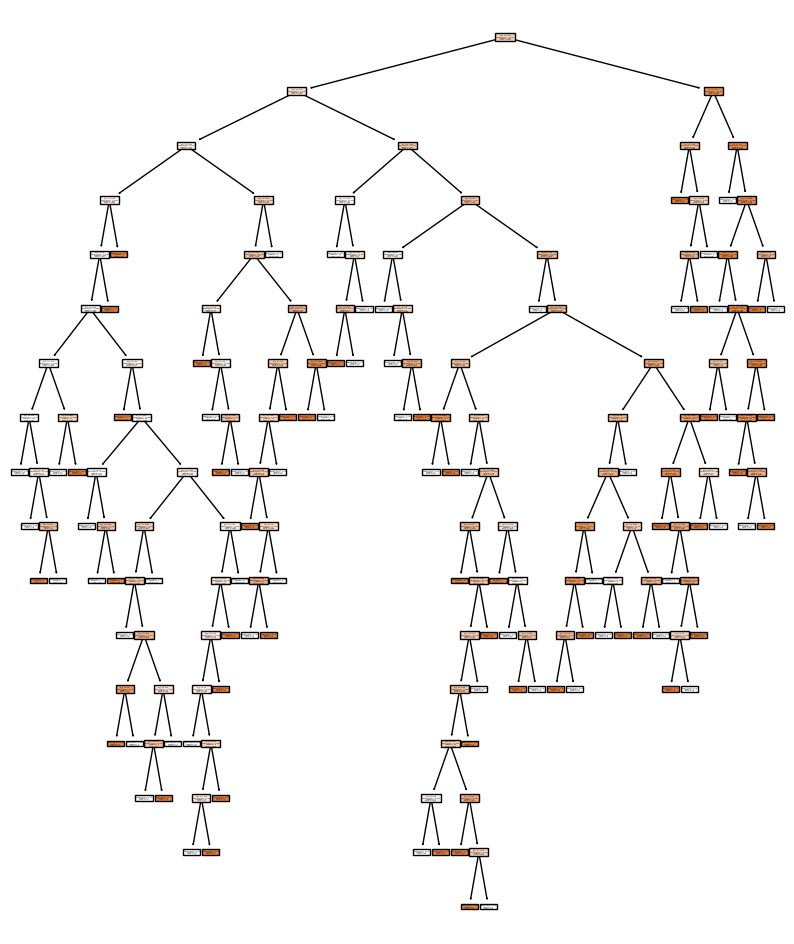

In [111]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(regressorcv,filled=True)

In [117]:
y_pred=regressorcv.predict(X_test)

In [113]:
y_pred

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0.

In [116]:
r2_score(y_pred,y_test)

-0.17769423558897235